In [72]:
# Install dependencies
import numpy as np
import pandas as pd
import einops
import matplotlib.dates as mdates
import datetime
import time
import matplotlib.pyplot as plt

print("success!")

success!


In [35]:
# Read in the datasets and drop 'London' row
income_df = pd.read_excel("datasets/cleaned/monthly_median_earnings.xlsx", index_col='Area').drop('London')
new_homes_df = pd.read_excel("datasets/cleaned/monthly_additional_dwellings.xlsx", index_col='Area').drop('London')
degrees_df = pd.read_excel("datasets/cleaned/monthly_degree_qualifs.xlsx", index_col='Area').drop('London')
house_price_df = pd.read_excel("datasets/cleaned/monthly_house_price.xlsx", index_col='Area').drop('London')

### Augment datasets
In order to train our models, we need many data points, so we will look at monthly data. <br>
* House price data already contains monthly values. <br>
* Income and degrees data do not have monthly values; we will augment the data using interpolation.
* New homes data does not have monthly values and is cumulative. This has been augmented on Excel by spreading the yearly value uniformly across each month.

In [36]:
# Interpolate missing values in the income and degrees
income_df = income_df.interpolate(axis=1, method='quadratic')
degrees_df = degrees_df.interpolate(axis=1, method='quadratic')

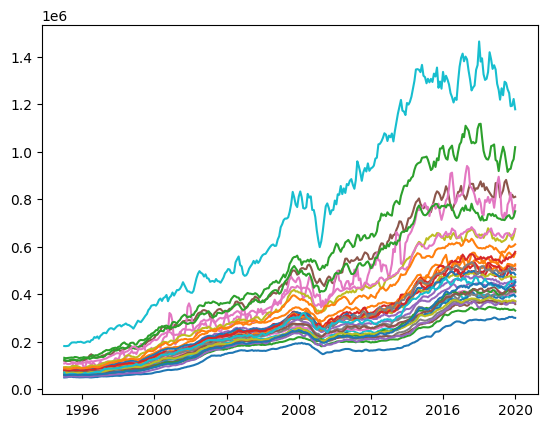

In [41]:
plt.plot(house_price_df.transpose())

In [70]:
# house_price_df.columns.strftime('%Y-%m-%d').to_numpy()
mdates.date2num(house_price_df.columns)

array([ 9131.,  9162.,  9190.,  9221.,  9251.,  9282.,  9312.,  9343.,
        9374.,  9404.,  9435.,  9465.,  9496.,  9527.,  9556.,  9587.,
        9617.,  9648.,  9678.,  9709.,  9740.,  9770.,  9801.,  9831.,
        9862.,  9893.,  9921.,  9952.,  9982., 10013., 10043., 10074.,
       10105., 10135., 10166., 10196., 10227., 10258., 10286., 10317.,
       10347., 10378., 10408., 10439., 10470., 10500., 10531., 10561.,
       10592., 10623., 10651., 10682., 10712., 10743., 10773., 10804.,
       10835., 10865., 10896., 10926., 10957., 10988., 11017., 11048.,
       11078., 11109., 11139., 11170., 11201., 11231., 11262., 11292.,
       11323., 11354., 11382., 11413., 11443., 11474., 11504., 11535.,
       11566., 11596., 11627., 11657., 11688., 11719., 11747., 11778.,
       11808., 11839., 11869., 11900., 11931., 11961., 11992., 12022.,
       12053., 12084., 12112., 12143., 12173., 12204., 12234., 12265.,
       12296., 12326., 12357., 12387., 12418., 12449., 12478., 12509.,
      

In [62]:
house_price_df.loc['Barking and Dagenham'].to_numpy()

1995-01-01     50460
1995-02-01     51086
1995-03-01     51269
1995-04-01     53134
1995-05-01     53042
               ...  
2019-09-01    305277
2019-10-01    304153
2019-11-01    305882
2019-12-01    301816
2020-01-01    301057
Name: Barking and Dagenham, Length: 301, dtype: int64

In [66]:
pred_2025_sr = np.empty
x = mdates.date2num(house_price_df.columns)
for borough in house_price_df.index:
    y = house_price_df.loc[borough].to_numpy()
    fit = np.polyfit(x, y, 1)
    line = np.poly1d(fit)
    line(mdates.date2num())



Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
City of London
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [71]:
house_price_df.columns

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', length=301, freq=None)